# Import and prepare data for the model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-history-of-baseball/home_game.csv
/kaggle/input/the-history-of-baseball/hall_of_fame.csv
/kaggle/input/the-history-of-baseball/fielding.csv
/kaggle/input/the-history-of-baseball/database.sqlite
/kaggle/input/the-history-of-baseball/all_star.csv
/kaggle/input/the-history-of-baseball/fielding_postseason.csv
/kaggle/input/the-history-of-baseball/park.csv
/kaggle/input/the-history-of-baseball/postseason.csv
/kaggle/input/the-history-of-baseball/college.csv
/kaggle/input/the-history-of-baseball/readme.txt
/kaggle/input/the-history-of-baseball/manager_award_vote.csv
/kaggle/input/the-history-of-baseball/player_award.csv
/kaggle/input/the-history-of-baseball/manager_award.csv
/kaggle/input/the-history-of-baseball/player.csv
/kaggle/input/the-history-of-baseball/manager.csv
/kaggle/input/the-history-of-baseball/batting.csv
/kaggle/input/the-history-of-baseball/team_half.csv
/kaggle/input/the-history-of-baseball/team.csv
/kaggle/input/the-history-of-baseball/manager_half.csv
/

In [2]:
#get rid of redundant error message
pd.options.mode.chained_assignment = None

In [3]:
pitchers=pd.read_csv('/kaggle/input/filtered/pitchers_filtered (1)').drop(columns='Unnamed: 0')
pitchers.head(10)

,playerID,stint,W,L,G,GS,CG,SHO,SV,H,...,SF,GIDP,IP,inducted,percent,threshold,votedBy,year,years,name
0,newsobo01,39.0,211.0,222.0,600.0,483.0,246.0,31.0,21.0,3769.0,...,0.0,0.0,3759.333333,N,0.094118,0.750000,BBWAA,1973.0,13.0,Bobo Newsom
1,johnto01,30.0,288.0,231.0,760.0,700.0,162.0,46.0,4.0,4783.0,...,0.0,0.0,4710.333333,N,0.317254,0.751391,BBWAA,2009.0,15.0,Tommy John
2,kaatji01,31.0,283.0,237.0,898.0,625.0,180.0,31.0,18.0,4620.0,...,0.0,0.0,4530.333333,N,0.295508,0.751773,BBWAA,2003.0,15.0,Jim Kaat
3,ryanno01,27.0,324.0,292.0,807.0,773.0,222.0,61.0,3.0,3923.0,...,0.0,0.0,5386.000000,Y,0.987928,0.750503,BBWAA,1999.0,1.0,Nolan Ryan
4,carltst01,31.0,329.0,244.0,741.0,709.0,254.0,55.0,2.0,4672.0,...,0.0,0.0,5217.333333,Y,0.956140,0.750000,BBWAA,1994.0,1.0,Steve Carlton
5,oroscje01,29.0,87.0,80.0,1252.0,4.0,0.0,0.0,144.0,1055.0,...,6.0,0.0,1295.333333,N,0.001855,0.751391,BBWAA,2009.0,1.0,Jesse Orosco
6,niekrph01,29.0,318.0,274.0,864.0,716.0,245.0,45.0,29.0,5044.0,...,0.0,0.0,5404.333333,Y,0.803383,0.746300,BBWAA,1997.0,5.0,Phil Niekro
7,wilheho01,31.0,143.0,122.0,1070.0,52.0,20.0,5.0,227.0,1757.0,...,0.0,0.0,2254.333333,Y,0.837975,0.751899,BBWAA,1985.0,8.0,Hoyt Wilhelm
8,houghch01,27.0,216.0,216.0,858.0,440.0,107.0,13.0,61.0,3283.0,...,0.0,0.0,3801.333333,N,0.008016,0.751503,BBWAA,2000.0,1.0,Charlie Hough
9,mulhote01,32.0,124.0,142.0,685.0,332.0,46.0,10.0,5.0,2833.0,...,24.0,0.0,2575.666667,N,0.000000,0.750436,BBWAA,2012.0,1.0,Terry Mulholland


This dataset already has the full player names.

In [4]:
#can't use data in which 'percent' column is null
pitchers2=pitchers[-pitchers['percent'].isnull()].reset_index().drop(columns='index')

In [5]:
y=pitchers2['percent']
features=['W','SHO','H','SO','BFP','IP']
X=pitchers2[features]

# Create decision tree regressor model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

# Evaluate the model

Make new dataframe with all testing data, add predictions, whether each prediction would warrant a hall of fame induction, and if the prediction was correct.

In [7]:
df=pd.DataFrame(val_X)
df['prediction']=predictions
df=df.join(pitchers2[['playerID','name','inducted','percent','threshold','year']])
df['guess']=''
for index in df.reset_index()['index']:
    if df['prediction'][index]>=df['threshold'][index]:
        df['guess'][index]='Y'
    else:
        df['guess'][index]='N'
df['correct?']=df['guess']==df['inducted']

Change the order of the columns (makes it easier to interpret a player's atributes).

In [8]:
df=df[['name','playerID','W','SHO','H','SO','BFP','IP','percent','threshold','year','inducted','prediction','guess',
      'correct?']]
#view first five rows
df.head(5)

,name,playerID,W,SHO,H,SO,BFP,IP,percent,threshold,year,inducted,prediction,guess,correct?
150,Mark Langston,langsma01,179.0,18.0,2723.0,2464.0,12562.0,2962.666667,0.000000,0.750000,2005.0,N,0.038961,N,True
169,Carl Mays,maysca01,207.0,29.0,2912.0,862.0,12385.0,3021.333333,0.022556,0.751880,1958.0,N,0.240695,N,True
91,Art Nehf,nehfar01,184.0,28.0,2715.0,844.0,11185.0,2707.666667,0.048872,0.751880,1958.0,N,0.015038,N,True
299,Dizzy Dean,deandi01,150.0,26.0,1919.0,1163.0,8171.0,1967.333333,0.791667,0.750000,1953.0,Y,0.153247,N,False
298,Tom Browning,brownto05,123.0,12.0,1931.0,1000.0,8066.0,1921.000000,0.001942,0.751456,2001.0,N,0.008264,N,True


In [9]:
df['correct?'].value_counts()

True     125
False     16
Name: correct?, dtype: int64

125/141 correct, or 88.7%.

A closer look at the actual hall of famer's shows that this model doesn't do very good job at successfully identifying players that are in the hall of fame.

In [10]:
pd.set_option('display.max_rows', None)
hof=df[df['inducted']=='Y']
hof

,name,playerID,W,SHO,H,SO,BFP,IP,percent,threshold,year,inducted,prediction,guess,correct?
299,Dizzy Dean,deandi01,150.0,26.0,1919.0,1163.0,8171.0,1967.333333,0.791667,0.750000,1953.0,Y,0.153247,N,False
336,Babe Ruth,ruthba01,94.0,17.0,974.0,488.0,5006.0,1221.333333,0.951327,0.752212,1936.0,Y,0.003759,N,False
11,Greg Maddux,maddugr01,355.0,35.0,4726.0,3371.0,20421.0,5008.333333,0.971979,0.751313,2014.0,Y,0.317254,N,False
275,Bob Lemon,lemonbo01,207.0,31.0,2559.0,1277.0,12099.0,2850.000000,0.786082,0.750000,1976.0,Y,0.074627,N,False
106,Pedro Martinez,martipe02,219.0,17.0,2221.0,3154.0,11394.0,2827.333333,0.910747,0.750455,2015.0,Y,0.522727,N,False
4,Steve Carlton,carltst01,329.0,55.0,4672.0,4136.0,21683.0,5217.333333,0.956140,0.750000,1994.0,Y,0.796902,Y,True
95,Christy Mathewson,mathech01,373.0,79.0,4218.0,2502.0,19136.0,4780.666667,0.907080,0.752212,1936.0,Y,0.919440,Y,True
6,Phil Niekro,niekrph01,318.0,45.0,5044.0,3342.0,22677.0,5404.333333,0.803383,0.746300,1997.0,Y,0.317254,N,False
12,Dennis Eckersley,eckerde01,197.0,20.0,3076.0,2401.0,13534.0,3285.666667,0.832016,0.750988,2004.0,Y,0.020654,N,False
14,Gaylord Perry,perryga01,314.0,53.0,4938.0,3534.0,21953.0,5350.333333,0.772009,0.751693,1991.0,Y,0.816068,Y,True


In [11]:
hof['correct?'].value_counts()

False    10
True      5
Name: correct?, dtype: int64

Only 5/15 hall of famers were actually predicted to be in the hall of fame.

# Visualize the data and predictions

In [12]:
import matplotlib.pyplot as plt

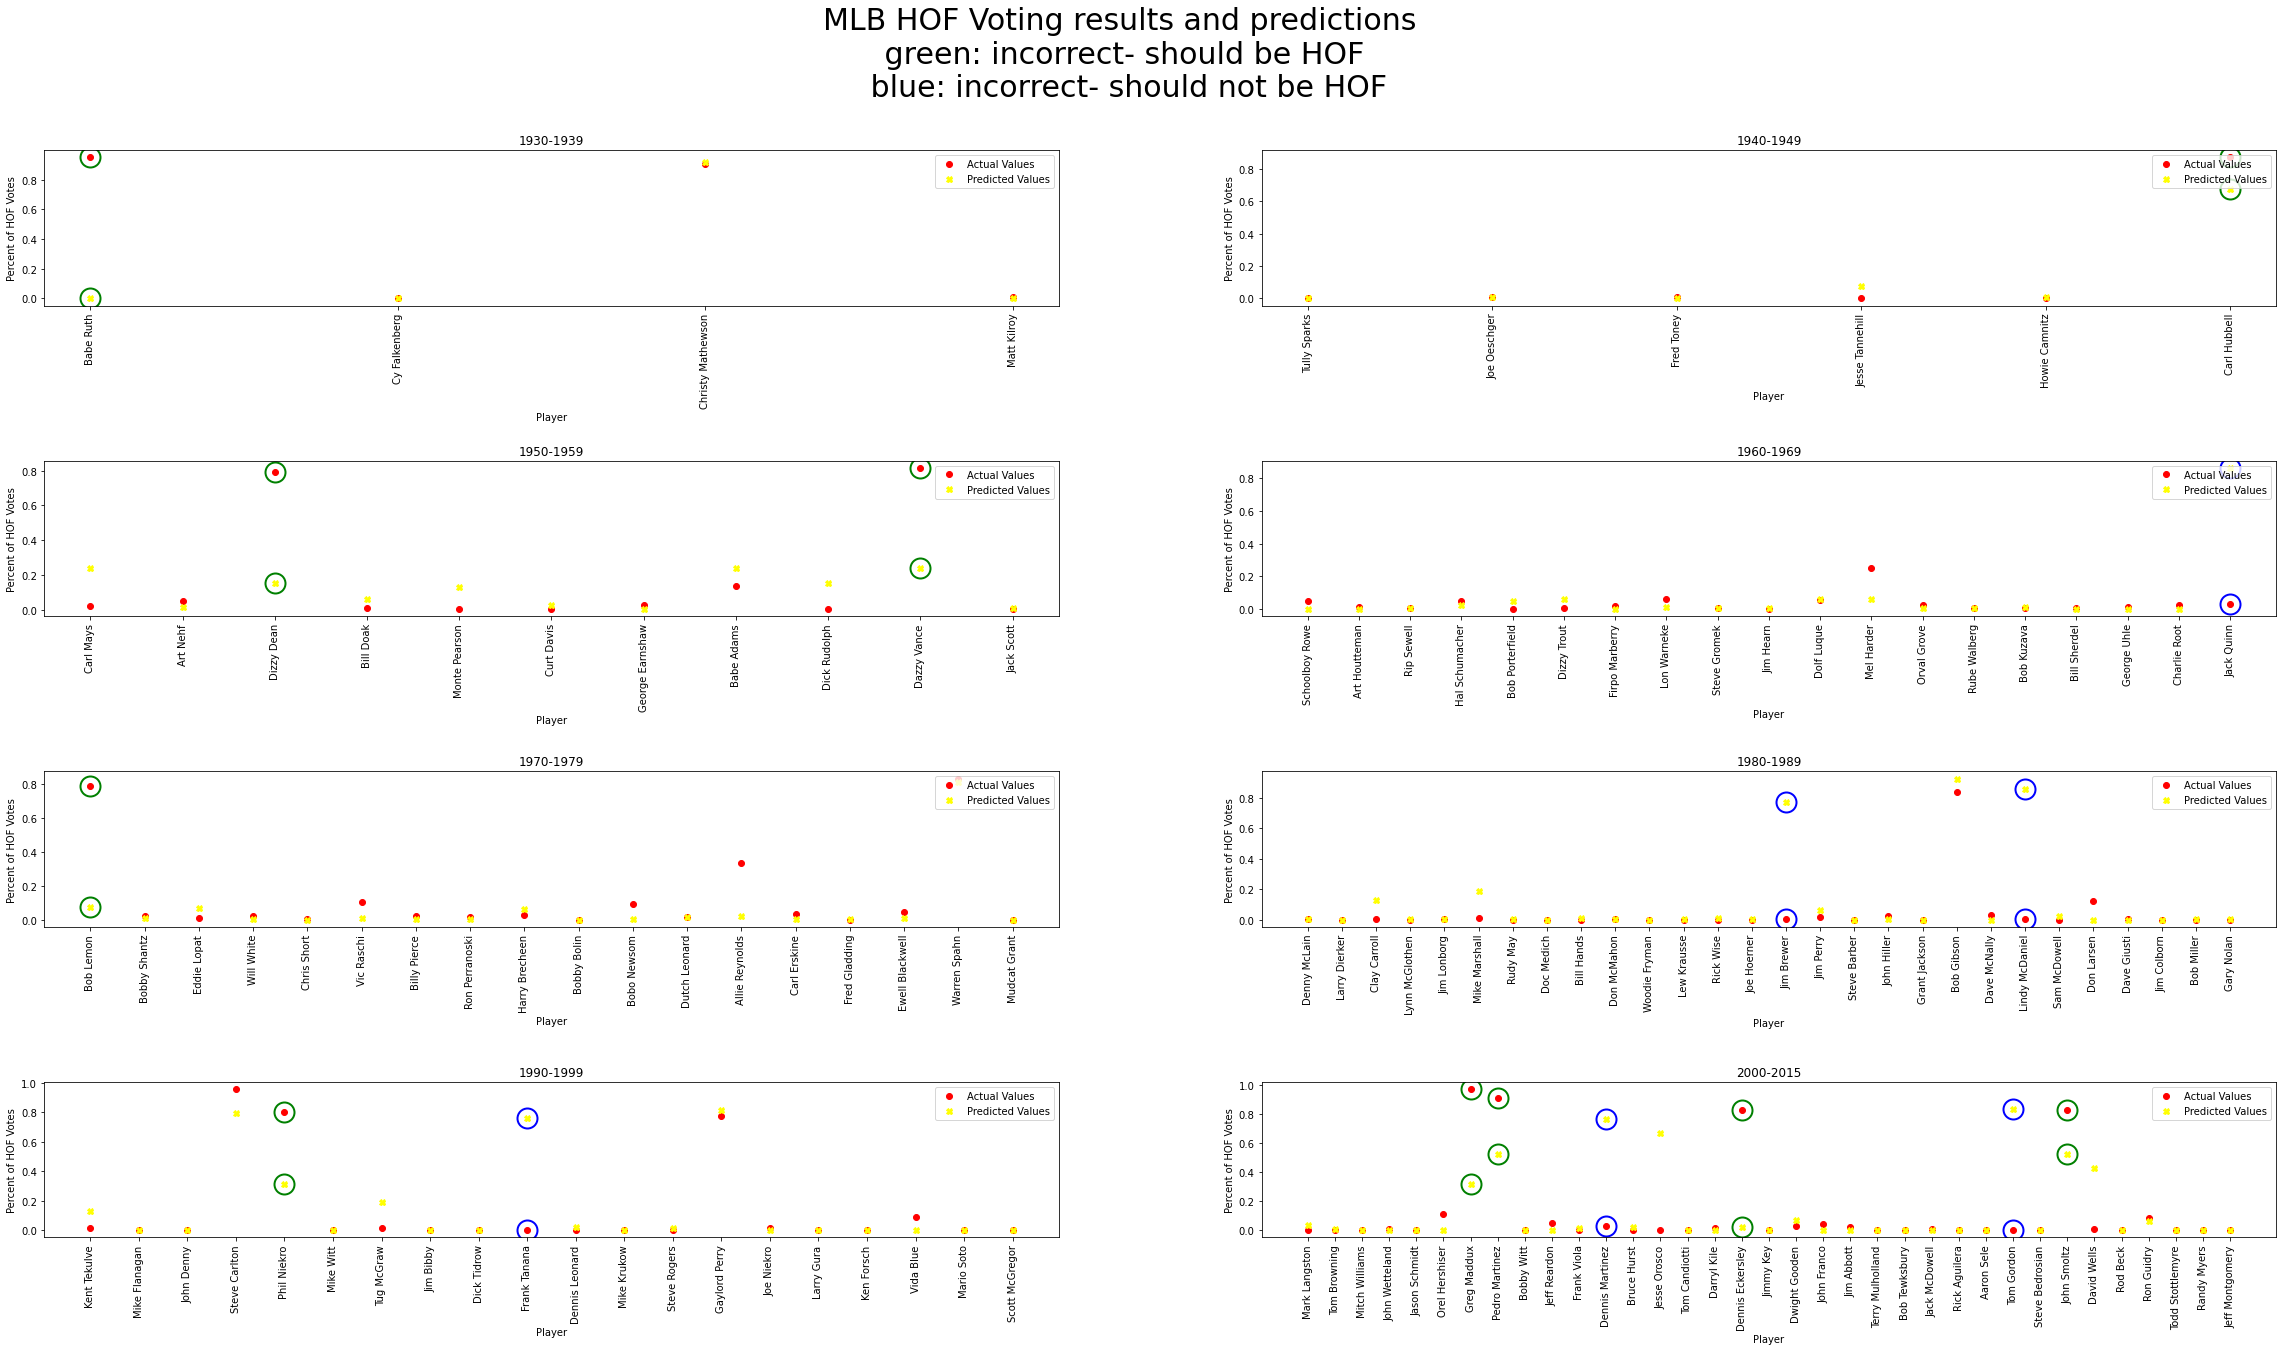

In [13]:
s30=range(1930,1940)
s40=range(1940,1950)
s50=range(1950,1960)
s60=range(1960,1970)
s70=range(1970,1980)
s80=range(1980,1990)
s90=range(1990,2000)
s2000 = range(2000,2016)

decades=[s30,s40,s50,s60,s70,s80,s90,s2000]

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(40, 20))
fig.subplots_adjust(hspace=1)
plt.suptitle('MLB HOF Voting results and predictions \n green: incorrect- should be HOF \n blue: incorrect- should not be HOF',fontsize=30)

for decade,ax in zip(decades,axes.flatten()):
    frame=df[df['year'].isin(decade)]
    
    ax.plot(frame['name'],frame['percent'],'o',color='red',label = 'Actual Values')

    ax.plot(frame['name'],frame['prediction'],'X',color='yellow',label = 'Predicted Values')
  
    incorrect=frame[frame['correct?'].isin([False])]
    circle_rad = 10 
    
    overshoot=incorrect[incorrect['prediction']>incorrect['percent']]
    ax.plot(overshoot['name'], overshoot['percent'], 'o',ms=circle_rad * 2, mec='b', mfc='none', mew=2)
    ax.plot(overshoot['name'], overshoot['prediction'], 'o',ms=circle_rad * 2, mec='b', mfc='none', mew=2)
    
    undershoot=incorrect[incorrect['percent']>incorrect['prediction']]
    ax.plot(undershoot['name'], undershoot['percent'], 'o',ms=circle_rad * 2, mec='g', mfc='none', mew=2)
    ax.plot(undershoot['name'], undershoot['prediction'], 'o',ms=circle_rad * 2, mec='g', mfc='none', mew=2)
    
    ax.set_xlabel('Player')
    ax.set_ylabel('Percent of HOF Votes')
    ax.set_title(str(decade[0])+'-'+str(decade[-1]))
    ax.legend(loc = 'upper right')
    ax.set_xticklabels(labels=frame['name'],rotation=90)

# Interpreting the visuals

The green and blue circles help identify where our predictions were wrong; blue representing a player that was wrongfully predicted to be in the HOF, green representing a player that was wrongfully predicted to not be in the HOF.

Let's take a closer look at the incorrect predictions.

In [14]:
incorrect=df[df['correct?'].isin([False])]
incorrect

,name,playerID,W,SHO,H,SO,BFP,IP,percent,threshold,year,inducted,prediction,guess,correct?
299,Dizzy Dean,deandi01,150.0,26.0,1919.0,1163.0,8171.0,1967.333333,0.791667,0.750000,1953.0,Y,0.153247,N,False
336,Babe Ruth,ruthba01,94.0,17.0,974.0,488.0,5006.0,1221.333333,0.951327,0.752212,1936.0,Y,0.003759,N,False
11,Greg Maddux,maddugr01,355.0,35.0,4726.0,3371.0,20421.0,5008.333333,0.971979,0.751313,2014.0,Y,0.317254,N,False
275,Bob Lemon,lemonbo01,207.0,31.0,2559.0,1277.0,12099.0,2850.000000,0.786082,0.750000,1976.0,Y,0.074627,N,False
106,Pedro Martinez,martipe02,219.0,17.0,2221.0,3154.0,11394.0,2827.333333,0.910747,0.750455,2015.0,Y,0.522727,N,False
6,Phil Niekro,niekrph01,318.0,45.0,5044.0,3342.0,22677.0,5404.333333,0.803383,0.746300,1997.0,Y,0.317254,N,False
18,Dennis Martinez,martide01,245.0,30.0,3897.0,2149.0,16754.0,3999.666667,0.031621,0.750988,2004.0,N,0.763975,Y,False
12,Dennis Eckersley,eckerde01,197.0,20.0,3076.0,2401.0,13534.0,3285.666667,0.832016,0.750988,2004.0,Y,0.020654,N,False
29,Frank Tanana,tananfr01,240.0,34.0,4063.0,2773.0,17641.0,4188.333333,0.000000,0.750503,1999.0,N,0.763975,Y,False
102,Jim Brewer,breweji01,69.0,1.0,898.0,810.0,4298.0,1040.666667,0.004819,0.751807,1982.0,N,0.769231,Y,False


In [15]:
incorrect['inducted'].value_counts()

Y    10
N     6
Name: inducted, dtype: int64

6 were false positives (blue), and 10 were false negatives (green).

Takeaways:

88.7% accuracy seems good at first, but a closer look reveals that this stat is just propped up by all the easy predictions made on players that clearly should not be in the hall of fame. 

When it comes to true contenders, the model does not do so well. Only 5/15 hall of famers were actually predicted to be in the hall.

6 players were wrongfully predicted to be in the HOF, this means that most (6/11) out of the playes predicted to be in the HOF are not actually in it.

# Future work

This notebook was a rough draft, meaning there is much room for improvement that I have left undone.

There are so many ways to improve this model. Some ideas include:

1. Including player awards such as MVP, Cy young, and many other baseball awards
2. Include advanced stats such as WHIP (walks+hits per inings pitched), BB/9, K/9
3. Include postseason stats and other stats that weren't included in this model.
4. Changing the paramaters to fine tune the model- I have some other machine learning notebooks that show how to do this
5. Try a different type of model, ex. random forest regressor
6. Instead of predicting percent of the vote, try making it a bunary classification problem. That is, rather than predict a numerical value and determine if that warrants a HOF induction, simply predict whether or not a player will get inducted into the HOF.
7. The data used for this project is dated. Data through 2020 will help create a better model. It may be hard to find that data, however, and the data for this project was already avaialable on kaggle which made it easier to use
8. There are more ways to help improve the model as these are just what come to mind. The other notebooks show how I combined data from different datasets to create the data for this model, and how I decided which features to put in the model.